In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Функции для анализа

In [4]:
"""
Функция для рисования боксплотов
"""

def print_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column])],
               ax=ax)
    ax.set_title(column.upper())
    plt.show()

In [5]:
"""
Функция для проведения теста Стьюдента
"""
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [7]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

13 параметров числовых типов (12 float, 1 int), 17 строковых. 
Среди численных параметров имеются номинативные (в части представления категории в виде числа)
Почти во всех параметрах имеются пропуски. Максимальное количество пропусков в параметре Pstatus - 45 пропусков.
Целевой параметр - score

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Анализ целевого параметра "score"
баллы по госэкзамену по математике

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

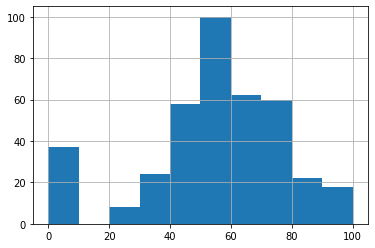

In [9]:
df.loc[:, ['score']].info()
df['score'].hist()
df['score'].describe()

Имеются пустые значения, которые необходимо удалить из таблицы для чистоты дальнейшей модели

In [10]:
len(df)

395

In [11]:
df.dropna(subset = ['score'], inplace=True)

In [12]:
len(df) #проверка на удаление строк с пустыми значениями score

389

In [13]:
print('Уникальных значений:', df['score'].nunique())

Уникальных значений: 18


Проверка на выбросы:

In [14]:
IQR = df['score'].quantile(0.75) -df['score'].quantile(0.25)
perc25 = df['score'].quantile(0.25)
perc75 = df['score'].quantile(0.75)
lower_bound = perc25 - 1.5*IQR
upper_bound = perc75 + 1.5*IQR

In [15]:
print('25-ый процентиль: {},'.format(perc25),
     '75-ый процентиль: {},'.format(perc75),
     'IQR: {},'.format(IQR),
     'Границы выбросов: [{}, {}]'.format(lower_bound, upper_bound), '\n'
     'Нижняя допустимая граница меньше фактического минимального значения: {}'.format(lower_bound < df['score'].min()), '\n'
     'Верхняя допустимая граница больше фактического максимального значения: {}'.format(upper_bound > df['score'].max())
     )

25-ый процентиль: 40.0, 75-ый процентиль: 70.0, IQR: 30.0, Границы выбросов: [-5.0, 115.0] 
Нижняя допустимая граница меньше фактического минимального значения: True 
Верхняя допустимая граница больше фактического максимального значения: True


Вывод 1. Выбросы в целевой переменной score отсутствуют

In [16]:
df['score'].value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Имеются 37 значений, где score = 0. Но поскольку значение не отклоняется, оснований убирать их нет

## Анализ числовых переменных

In [17]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.003762,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.058166,-0.344338
"studytime, granular",0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.082489,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,-0.047954,-0.129685


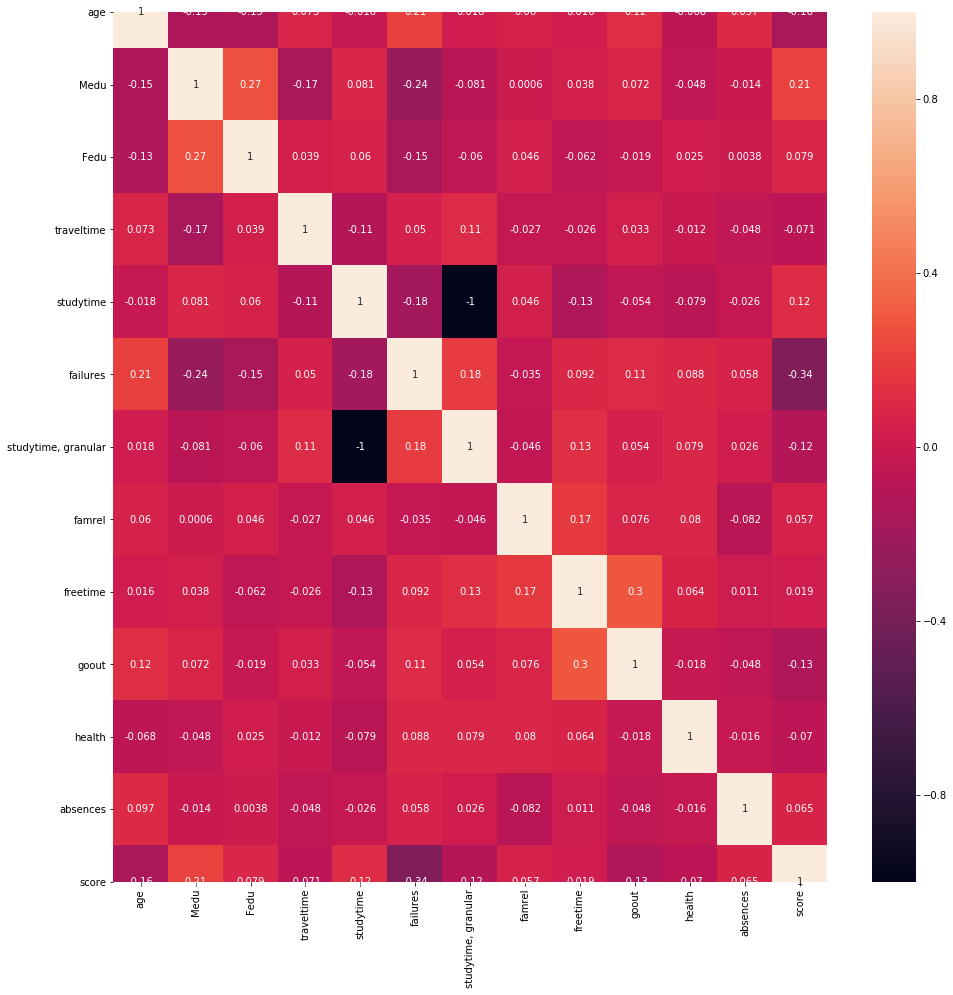

In [18]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

#vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False

Вывод 2. Корреляция между столбцами "studytime, granular" и "studytime" -1. Это значит, что столбцы дублируют друг друга. Столбец "studytime, granular" можно удалить

In [19]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

#### Параметр "age" 
возраст ученика (от 15 до 22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
age    389 non-null int64
dtypes: int64(1)
memory usage: 6.1 KB


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

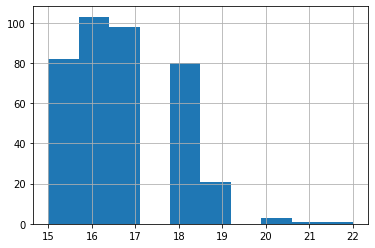

In [20]:
df['age'].hist()
df.loc[:, ['age']].info()
df['age'].describe()

In [21]:
df['age'].value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

In [22]:
IQR = df['age'].quantile(0.75) -df['age'].quantile(0.25)
perc25 = df['age'].quantile(0.25)
perc75 = df['age'].quantile(0.75)
lower_bound = perc25 - 1.5*IQR
upper_bound = perc75 + 1.5*IQR

In [23]:
print('25-ый процентиль: {},'.format(perc25),
     '75-ый процентиль: {},'.format(perc75),
     'IQR: {},'.format(IQR),
     'Границы выбросов: [{}, {}]'.format(lower_bound, upper_bound), '\n'
     'Нижняя допустимая граница меньше фактического минимального значения: {}'.format(lower_bound < df['age'].min()), '\n'
     'Верхняя допустимая граница больше фактического максимального значения: {}'.format(upper_bound > df['age'].max())
     )

25-ый процентиль: 16.0, 75-ый процентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0] 
Нижняя допустимая граница меньше фактического минимального значения: True 
Верхняя допустимая граница больше фактического максимального значения: False


In [24]:
df[df['age']>upper_bound]['age'] #выброс

247    22
Name: age, dtype: int64

Данная запись выбросом не считается, так как в условиях сказано, что в выборке представлены учащиеся от 15 до 22 лет

#### Параметр "Absences"
количество пропущенных занятий

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
absences    378 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


11

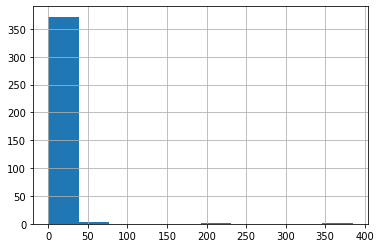

In [25]:
df['absences'].hist()
df.loc[:, ['absences']].info()
(df['absences'].value_counts()>5).sum()

In [26]:
IQR = df['absences'].quantile(0.75) -df['absences'].quantile(0.25)
perc25 = df['absences'].quantile(0.25)
perc75 = df['absences'].quantile(0.75)
lower_bound = perc25 - 1.5*IQR
upper_bound = perc75 + 1.5*IQR

In [27]:
print('25-ый процентиль: {},'.format(perc25),
     '75-ый процентиль: {},'.format(perc75),
     'IQR: {},'.format(IQR),
     'Границы выбросов: [{}, {}]'.format(lower_bound, upper_bound), '\n'
     'Нижняя допустимая граница меньше фактического минимального значения: {}'.format(lower_bound < df['absences'].min()), '\n'
     'Верхняя допустимая граница больше фактического максимального значения: {}'.format(upper_bound > df['absences'].max())
     )

25-ый процентиль: 0.0, 75-ый процентиль: 8.0, IQR: 8.0, Границы выбросов: [-12.0, 20.0] 
Нижняя допустимая граница меньше фактического минимального значения: True 
Верхняя допустимая граница больше фактического максимального значения: False


In [28]:
df[df['absences']>upper_bound]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


In [29]:
df[df['absences']>upper_bound]['absences']

40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64

Ислючаем их

In [30]:
df = df.loc[df.absences < upper_bound]

##### Параметр "Medu" - номинативный признак
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
Medu    354 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


4.0    121
2.0     91
3.0     87
1.0     52
0.0      3
Name: Medu, dtype: int64

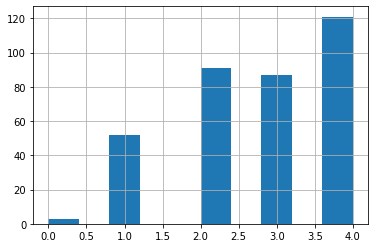

In [31]:
df['Medu'].hist()
df.loc[:, ['Medu']].info()
df['Medu'].value_counts()

Выборосов нет, все данные в пределах условия. Имеется 3 пропущенных значения

In [32]:
#заменим пустые значения на значения столбца 'Fedu' 
df.Medu = df[['Medu','Fedu']].apply(lambda x: x[1] if pd.isnull(x[0]) else x[0],axis=1)

#### Параметр "Fedu"
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [33]:
df.loc[:, ['Fedu']].info()
df['Fedu'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
Fedu    334 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


2.0     98
3.0     83
4.0     79
1.0     71
0.0      2
40.0     1
Name: Fedu, dtype: int64

Имеется некорректное значение "40.0"

In [34]:
df[df['Fedu'] == 40.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [35]:
#Заменим значение на 4.0
df.loc[11, ['Fedu']] = 4.0

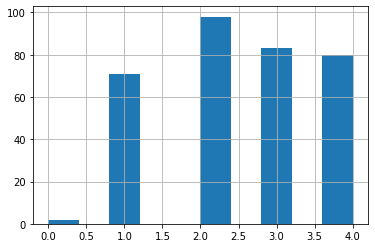

In [36]:
df['Fedu'].hist()

#### Параметр "Traveltime"
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
traveltime    329 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


1.0    219
2.0     84
3.0     19
4.0      7
Name: traveltime, dtype: int64

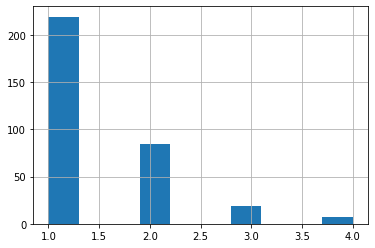

In [37]:
df['traveltime'].hist()
df.loc[:, ['traveltime']].info()
df['traveltime'].value_counts()

#### Параметр "Studytime"
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
studytime    352 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


2.0    171
1.0     95
3.0     59
4.0     27
Name: studytime, dtype: int64

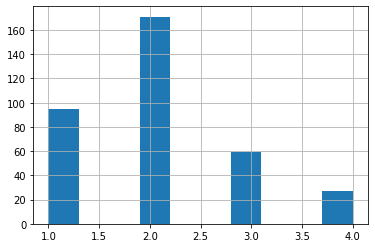

In [38]:
df['studytime'].hist()
df.loc[:, ['studytime']].info()
df['studytime'].value_counts()

In [39]:
df.groupby('traveltime')['score'].median()

traveltime
1.0    55.0
2.0    50.0
3.0    50.0
4.0    50.0
Name: score, dtype: float64

#### Параметр "Failures"
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
failures    338 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


0.0    272
1.0     40
2.0     13
3.0     13
Name: failures, dtype: int64

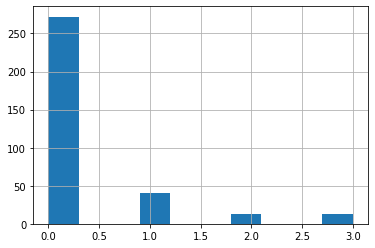

In [40]:
df['failures'].hist()
df.loc[:, ['failures']].info()
df['failures'].value_counts()

#### Параметр "Famrel"
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
famrel    332 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


 4.0    161
 5.0     93
 3.0     55
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64

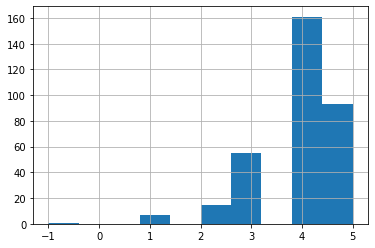

In [41]:
df['famrel'].hist()
df.loc[:, ['famrel']].info()
df['famrel'].value_counts()

Имеется выброс

In [42]:
df[df['famrel'] == -1.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [43]:
#Заменим значение на 1.0
df.loc[25, ['famrel']] = 1.0

#### Параметр "Freetime"
свободное время после школы (от 1 - очень мало до 5 - очень мого)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
freetime    351 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


3.0    143
4.0    103
2.0     56
5.0     34
1.0     15
Name: freetime, dtype: int64

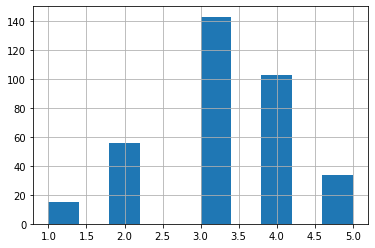

In [44]:
df['freetime'].hist()
df.loc[:, ['freetime']].info()
df['freetime'].value_counts()

#### Параметр "Goout"
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
goout    350 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


3.0    118
2.0     94
4.0     72
5.0     46
1.0     20
Name: goout, dtype: int64

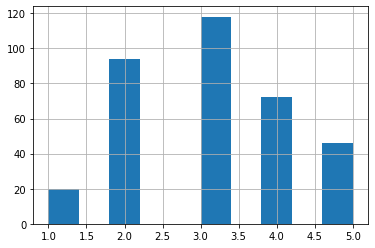

In [45]:
df['goout'].hist()
df.loc[:, ['goout']].info()
df['goout'].value_counts()

#### Параметр "Health"
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 1 columns):
health    342 non-null float64
dtypes: float64(1)
memory usage: 15.6 KB


5.0    127
3.0     81
4.0     55
1.0     41
2.0     38
Name: health, dtype: int64

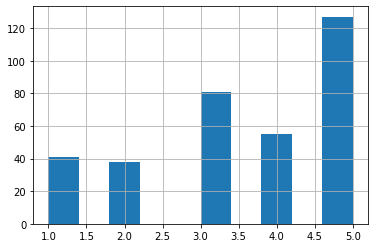

In [46]:
df['health'].hist()
df.loc[:, ['health']].info()
df['health'].value_counts()

После небольших манипуляций с данными перепроверим корреляцию между числовыми переменными

In [47]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.163398,-0.170595,0.062893,-0.000659,0.177371,0.060275,0.043224,0.133568,-0.056121,0.133498,-0.166284
Medu,-0.163398,1.000000,0.632153,-0.174112,0.084849,-0.239148,-0.011633,0.036228,0.054560,-0.042374,0.098270,0.216578
Fedu,-0.170595,0.632153,1.000000,-0.131371,0.004397,-0.294275,-0.024848,-0.004442,0.026379,0.018468,-0.007806,0.118032
traveltime,0.062893,-0.174112,-0.131371,1.000000,-0.100737,0.062962,-0.029358,0.001519,0.030346,0.003345,-0.086609,-0.073755
studytime,-0.000659,0.084849,0.004397,-0.100737,1.000000,-0.179233,0.030511,-0.134825,-0.040611,-0.086649,-0.067155,0.114856
failures,0.177371,-0.239148,-0.294275,0.062962,-0.179233,1.000000,-0.003534,0.093575,0.072740,0.098319,0.071433,-0.330130
famrel,0.060275,-0.011633,-0.024848,-0.029358,0.030511,-0.003534,1.000000,0.174626,0.082144,0.080041,-0.088293,0.063315
freetime,0.043224,0.036228,-0.004442,0.001519,-0.134825,0.093575,0.174626,1.000000,0.296558,0.040310,0.089239,0.030279
goout,0.133568,0.054560,0.026379,0.030346,-0.040611,0.072740,0.082144,0.296558,1.000000,0.000562,0.132140,-0.119548
health,-0.056121,-0.042374,0.018468,0.003345,-0.086649,0.098319,0.080041,0.040310,0.000562,1.000000,-0.019365,-0.054538


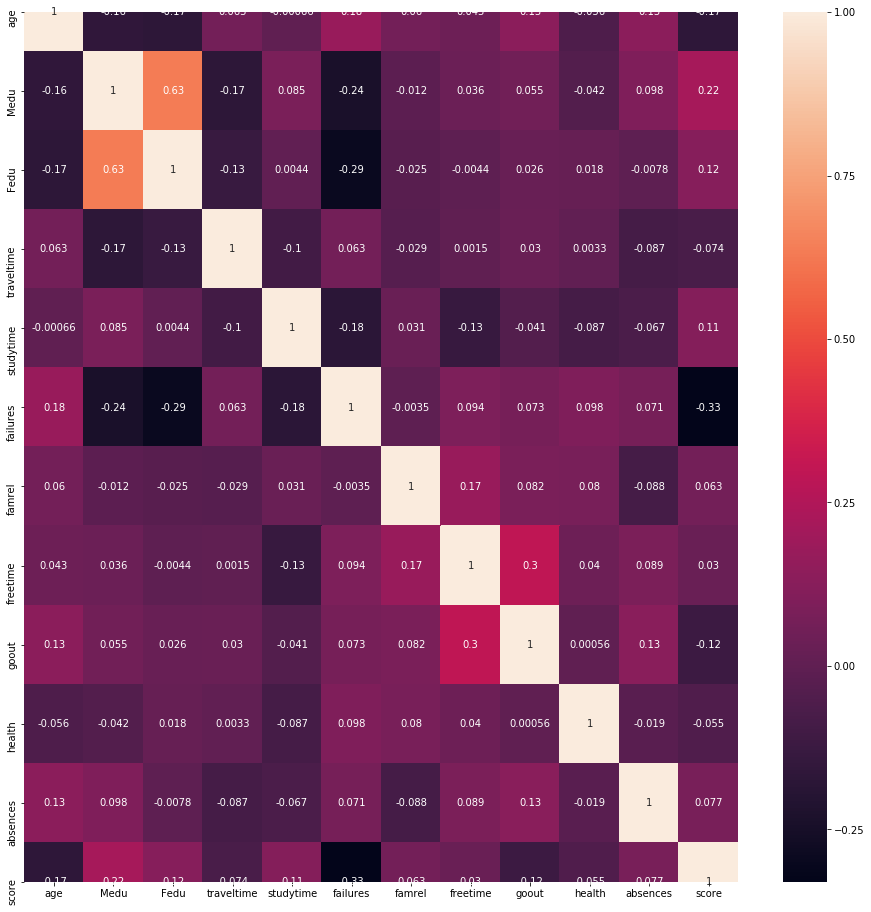

In [48]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Анализ номинативных переменных

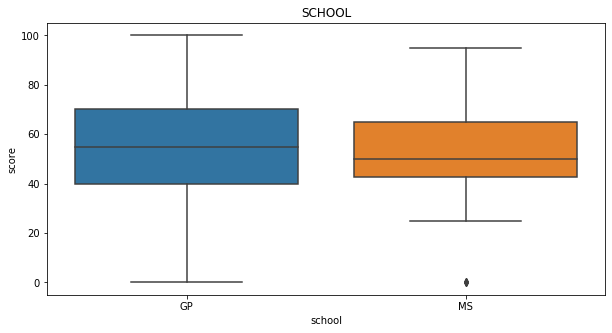

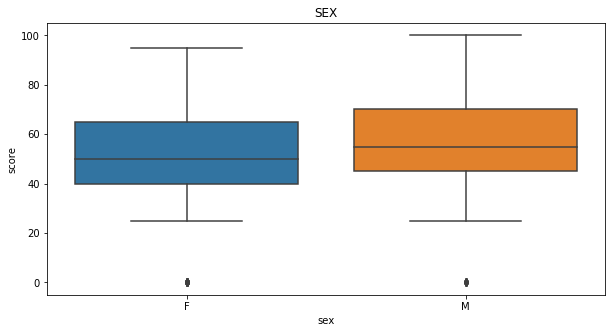

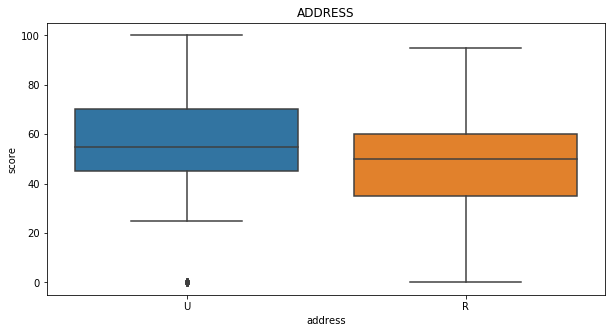

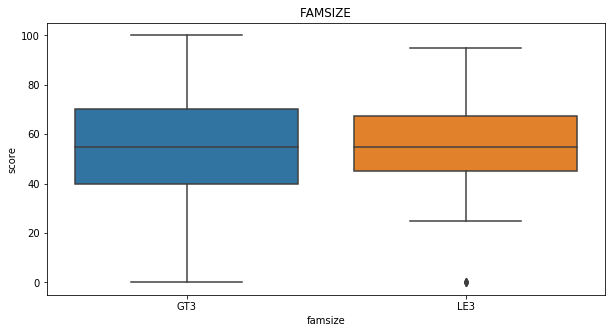

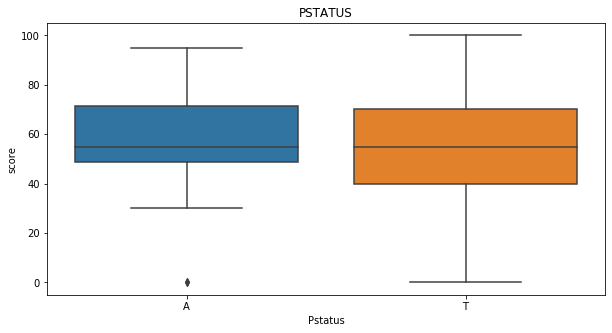

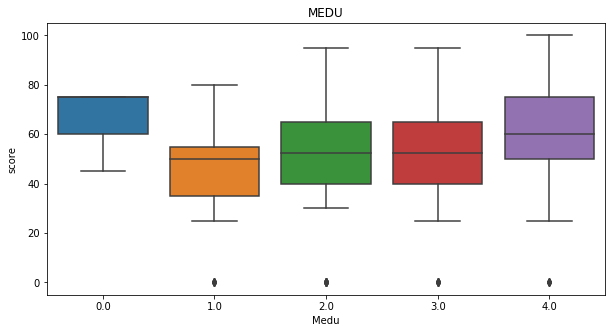

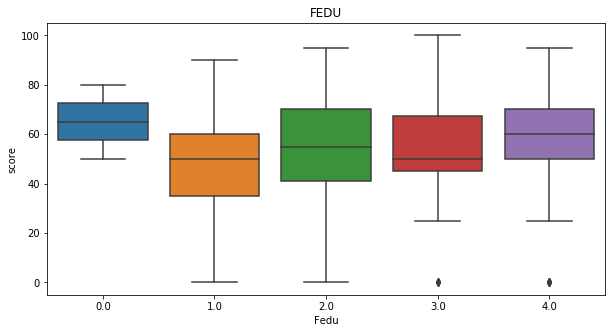

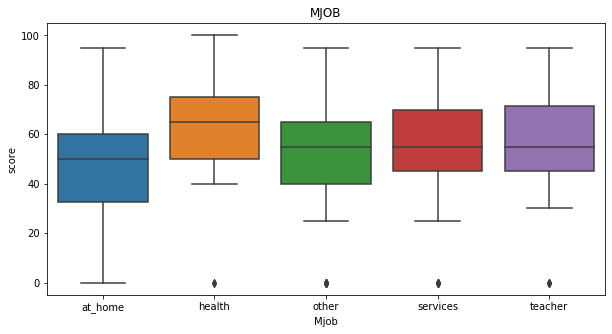

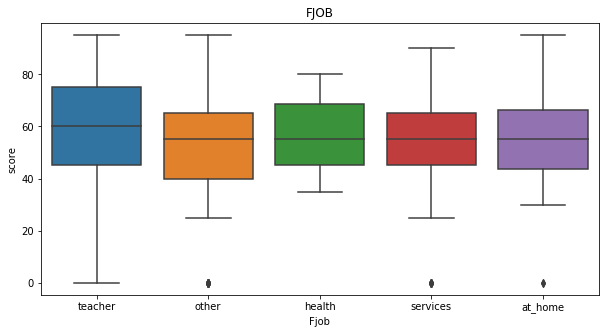

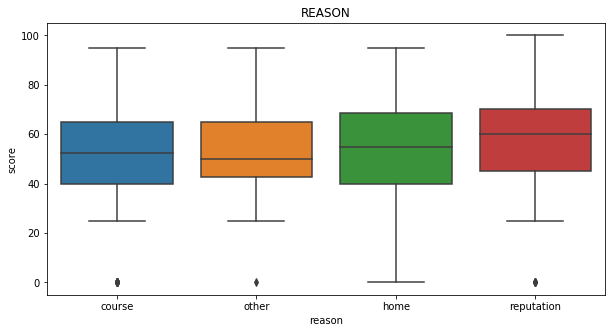

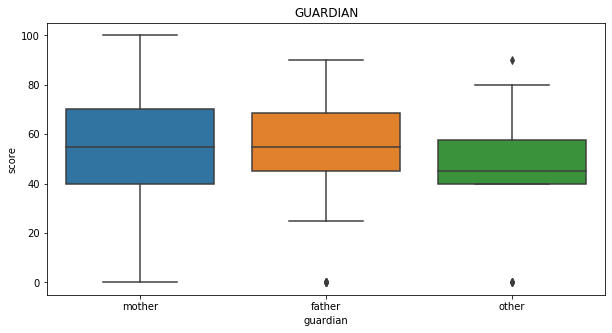

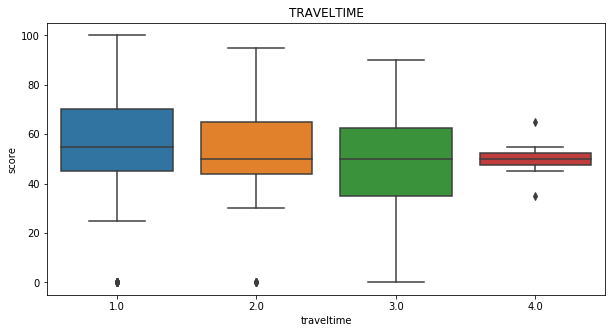

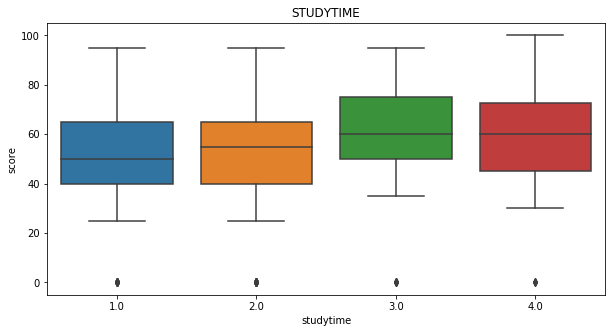

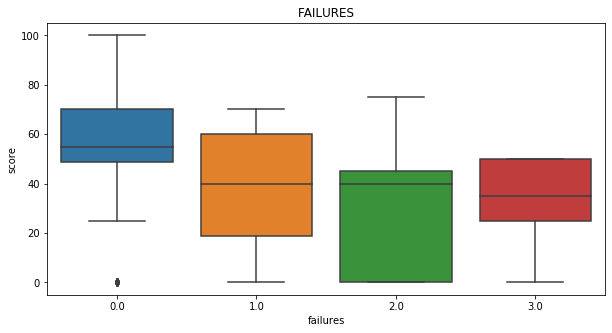

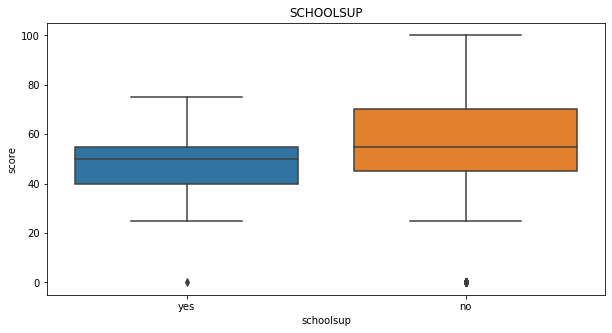

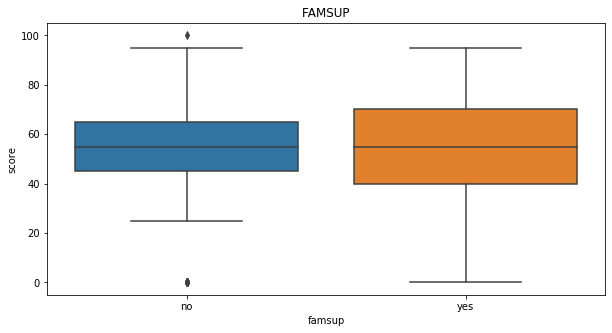

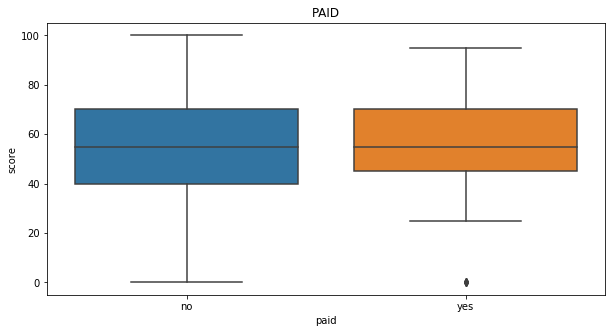

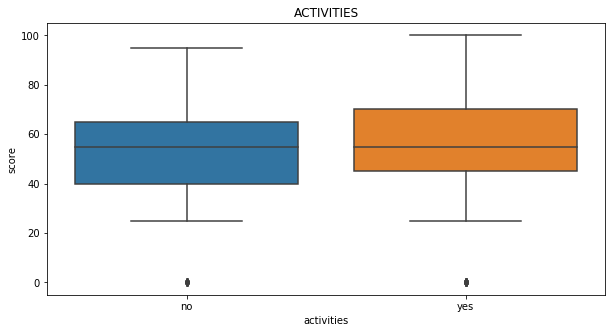

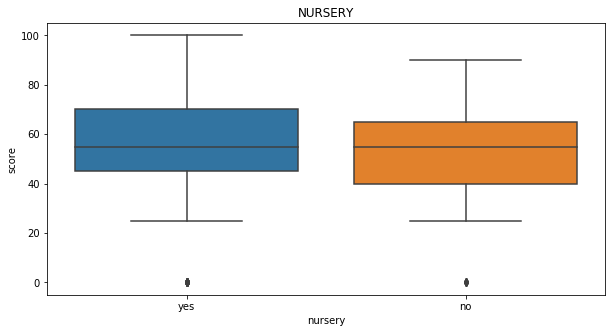

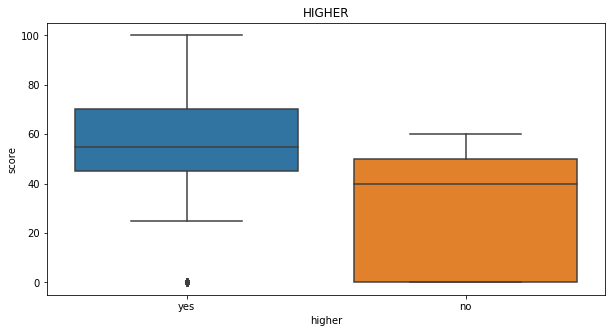

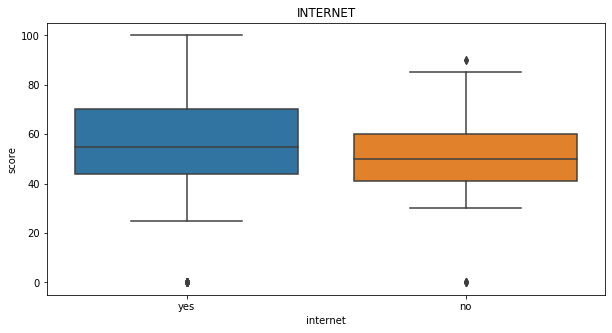

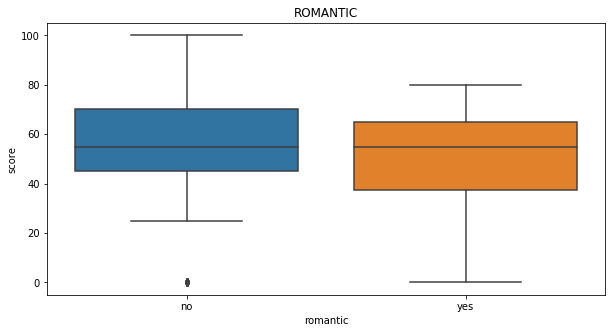

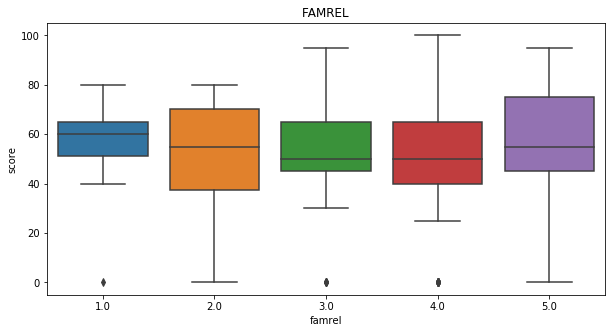

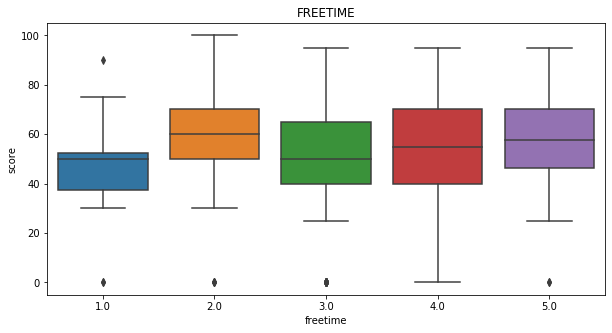

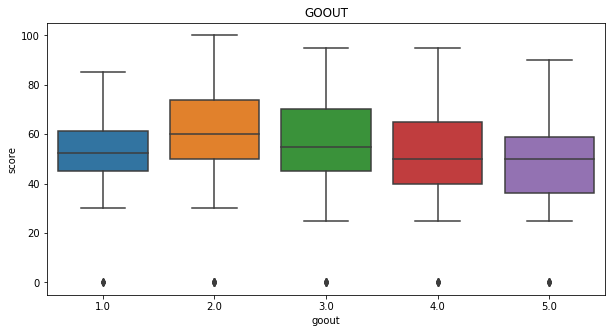

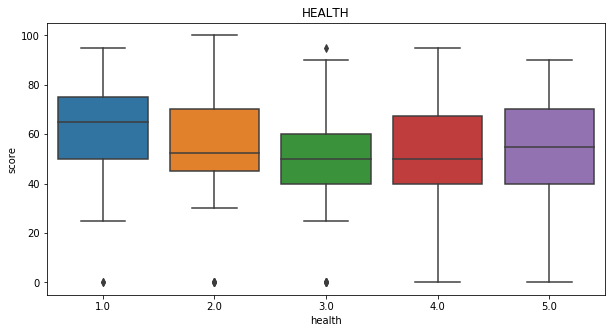

In [49]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
            'Fjob', 'reason', 'guardian', 'traveltime',
           'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    print_boxplot(col)

In [50]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
            'Fjob', 'reason', 'guardian', 'traveltime',
           'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Выводы

1. Данные достаточно чистые, за исключением столбца "absences", в котором имеются выбросы. В других столбцах выбросы легко заменяются.
2. Пропусков в данных не много, максимум 12%, в среднем 4%
3. Наблюдается положительная корреляция между параметрами "Пропуски" и "Баллы по математике"; отрицательная корреляция между параметрами "Возраст" и "Баллы по математике"
4. Важные параметры для построения модели: Возраст, Пропуски, Адрес, Образование матери, Работа матери, количество неучебных задач, желание получить образование, состоит ли в романтических отношениях, проведение времени с друзьями